<a href="https://colab.research.google.com/github/PkonradW/DataWranglingFiles/blob/main/finalcopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Pulse Predictoooors

* **Primary Question:** Which feature in the dataset is the most likely predictor for heart disease; which subsets have the greatest heart disease incident rates.
- **Secondary Question:** What subsets of the population have the smallest rate of heart disease, what factors are outside of our control.

### Contributors:
- Jake Vordran: Changed continuous variables into categorical variables, pycharts, contingency tables and chi-square tests
- Konrad Weakley: Chi-Square tests p-tests, notebook formatting, and drop down widgets
- Harry Doyle : Data Enrichment


# Preprocessing

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

### Generic Dataframes of Original Datasets

In [ ]:
url_20 = 'https://raw.githubusercontent.com/PkonradW/DataWranglingFiles/main/heart_2020_cleaned.csv'
df_20= pd.read_csv(url_20)

# Data Exploration


## Exploration


In [ ]:
df = pd.read_csv(url_20)
df = df.drop(['PhysicalHealth','MentalHealth', 'AgeCategory'], axis=1)

categorical_columns = ['Sex']
data_encoded = pd.get_dummies(df, columns=categorical_columns)
gen_health_mapping = {
    'Very good': 4,
    'Good': 3,
    'Excellent': 2,
    'Fair': 1,
    'Poor': 0
}
data_encoded['GenHealth'] = data_encoded['GenHealth'].map(gen_health_mapping)

data_encoded['HeartDisease'] = data_encoded['HeartDisease'].map({'Yes': 1, 'No': 0})


boolean_columns = data_encoded.select_dtypes(include='bool').columns
data_encoded[boolean_columns] = data_encoded[boolean_columns].astype(int)

data_encoded.describe().style.format("{:0.2f}")

,HeartDisease,BMI,GenHealth,SleepTime,Sex_Female,Sex_Male
count,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00
mean,0.09,28.33,2.82,7.10,0.52,0.48
std,0.28,6.36,1.13,1.44,0.50,0.50
min,0.00,12.02,0.00,1.00,0.00,0.00
25%,0.00,24.03,2.00,6.00,0.00,0.00
50%,0.00,27.34,3.00,7.00,1.00,0.00
75%,0.00,31.42,4.00,8.00,1.00,1.00
max,1.00,94.85,4.00,24.00,1.00,1.00


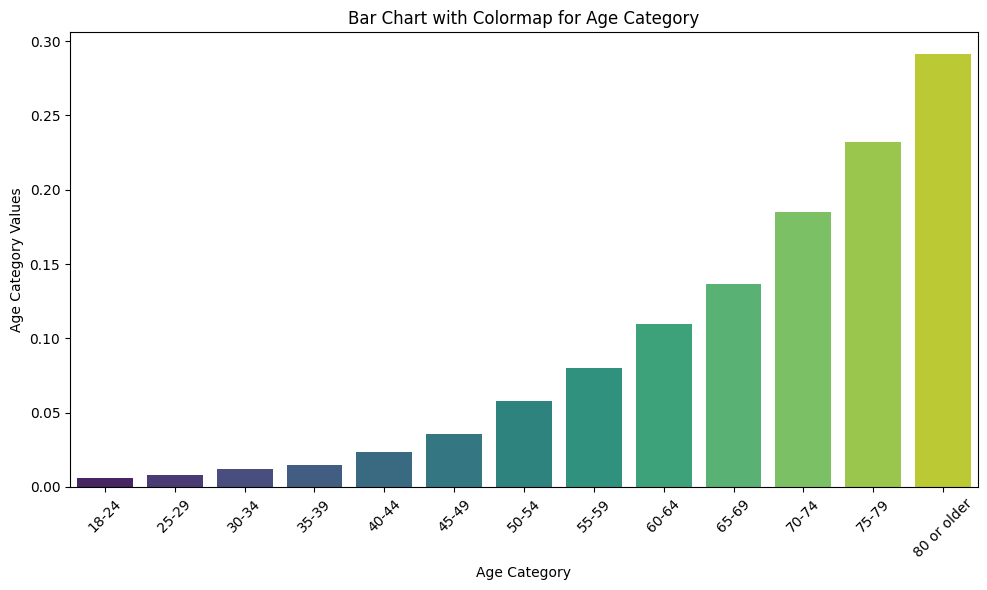

In [ ]:
df = pd.read_csv(url_20)
ratios_dict = {}

contingency_table = pd.crosstab(df['HeartDisease'], df['AgeCategory'])

yes_ratio = contingency_table.loc['Yes'] / contingency_table.loc['No']

ratios_dict['AgeCategory'] = yes_ratio


ratios_df = pd.DataFrame(ratios_dict)

ratios_df = ratios_df
plt.figure(figsize=(10, 6))
sns.barplot(x=ratios_df.index, y='AgeCategory', data=ratios_df, palette='viridis')
plt.xlabel('Age Category')
plt.ylabel('Age Category Values')
plt.title('Bar Chart with Colormap for Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv(url_20)

bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Typical Weight', 'Overweight', 'Obese']

sleep_time_bins = [0, 6.01, 8.01, 9.99, float('inf')]
sleep_time_labels = ['0-6', '6-8', '8-10', '10+']

df['BMI'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
df['SleepTime'] = pd.cut(df['SleepTime'], bins=sleep_time_bins, labels=sleep_time_labels)


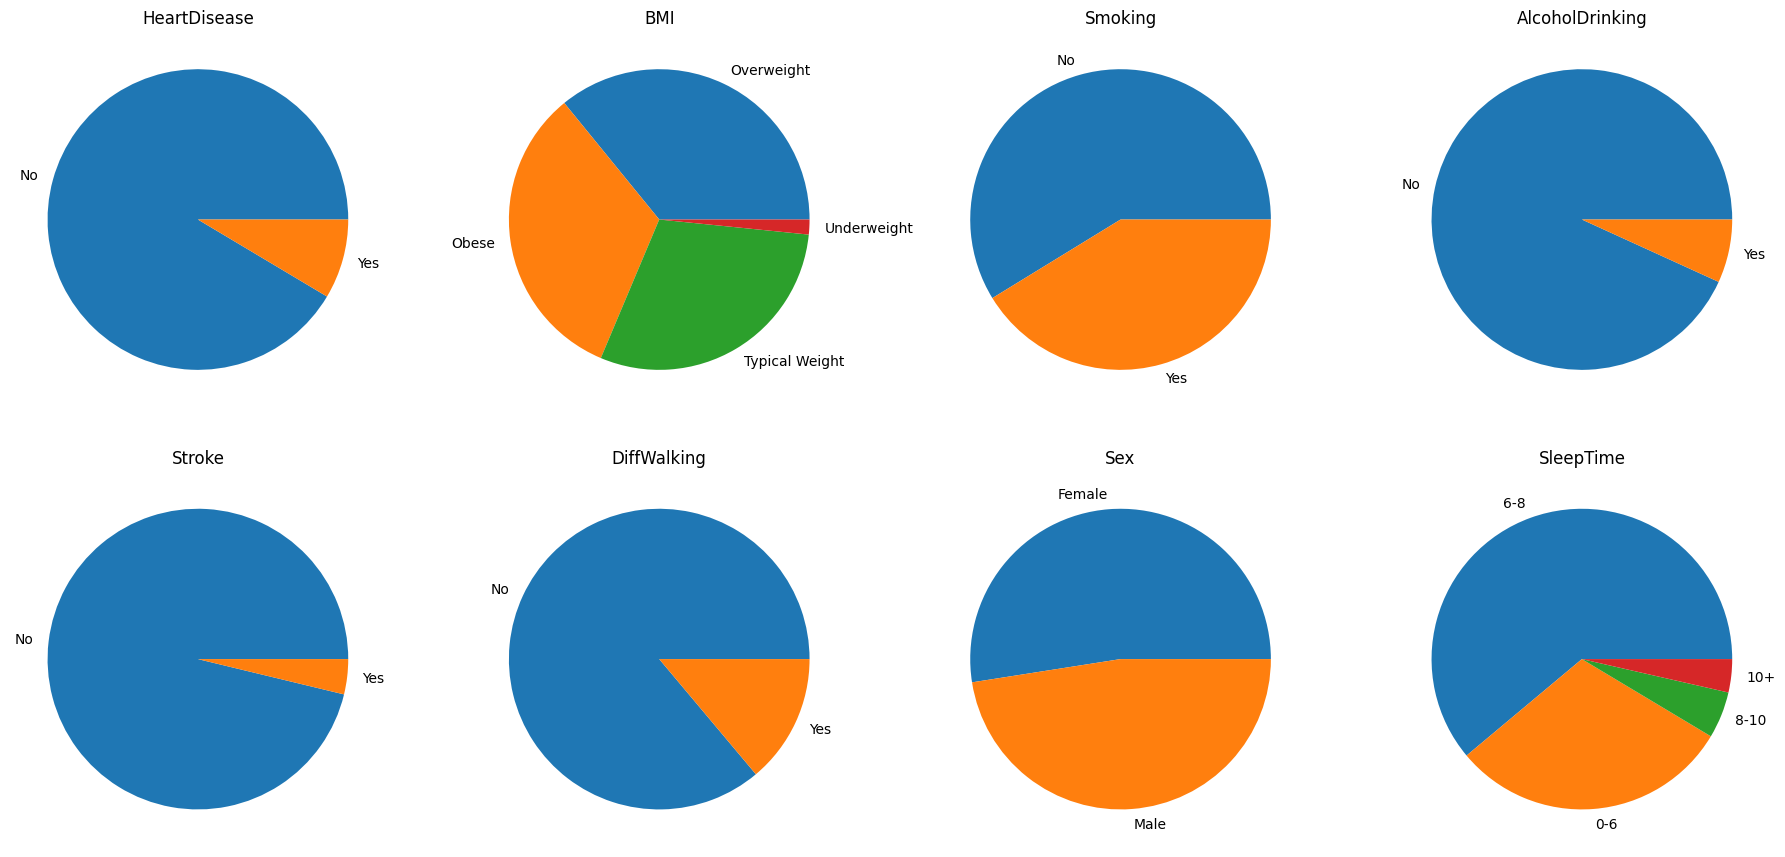

In [ ]:
columns = [
    'HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'SleepTime'
]

fig, axes = plt.subplots(2, 4, figsize=(18, 9))

for i, var in enumerate(columns):
    ax = axes[i // 4, i % 4]
    ax.pie(df[var].value_counts(), labels=df[var].value_counts().index, autopct=None)
    ax.set_title(var)

# Remove any unused subplots
for i in range(len(columns), 2 * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

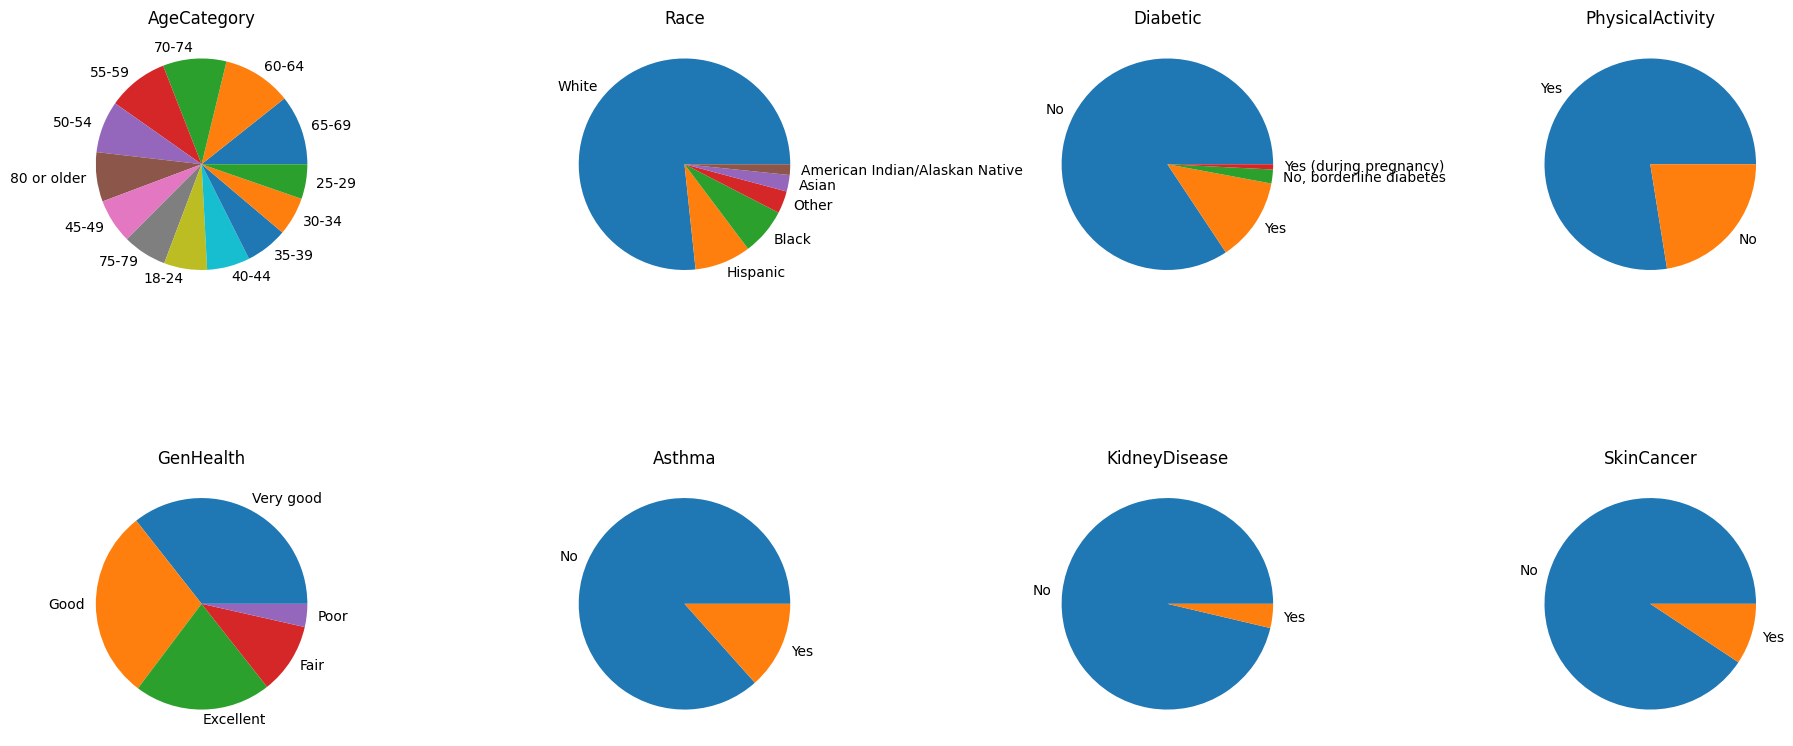

In [ ]:
columns = ['AgeCategory', 'Race', 'Diabetic','PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
fig, axes = plt.subplots(2, 4, figsize=(18, 9))


for i, var in enumerate(columns):
    ax = axes[i // 4, i % 4]
    ax.pie(df[var].value_counts(), labels=df[var].value_counts().index, autopct=None)
    ax.set_title(var)

for i in range(len(columns), 2 * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Difficulty walking also may indicate age group status, as seen below.

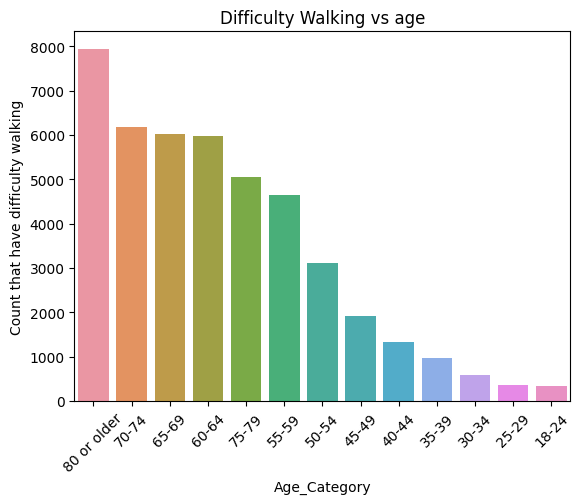

In [ ]:
age_bucket_df=df[df['DiffWalking']=='Yes']['AgeCategory']
counts=age_bucket_df.value_counts()
p = sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Age_Category')
plt.ylabel('Count that have difficulty walking')
plt.title('Difficulty Walking vs age')
plt.xticks(rotation=45)
plt.show()

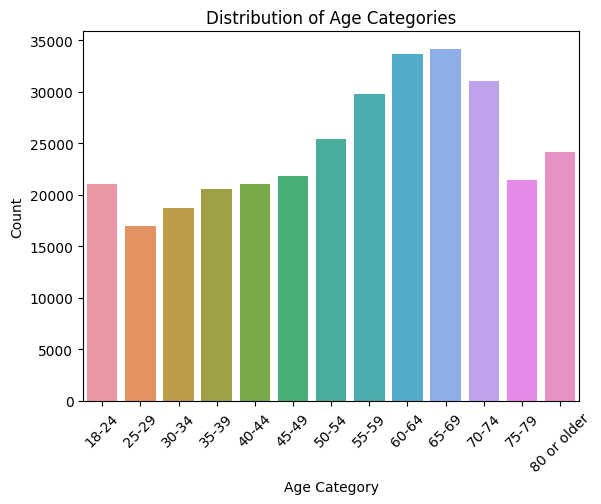

In [ ]:
counts=df['AgeCategory'].value_counts().sort_index()
p=sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.xticks(rotation=45)
plt.show()

##Data Enrichment

In [ ]:
df = pd.read_csv(url_20)
cat_vars = [
    "Smoking",
    "AlcoholDrinking",
    "Stroke",
    "DiffWalking",
    "Sex",
    "Diabetic",
    "Race",
    "PhysicalActivity",
    "GenHealth",
    "Asthma",
    "KidneyDisease",
    "SkinCancer",
    "AgeCategory"
]

In [ ]:
other_cats=['Sex', 'Race', 'GenHealth', 'AgeCategory']
cat_vars.extend(['Sex_Male', 'Sex_Female'])

# Convert 'Sex' into male and female binary vars
df['Sex_Male'] = 'No'
df['Sex_Female'] = 'No'
df.loc[df['Sex'] == 'Male', 'Sex_Male'] = 'Yes'
df.loc[df['Sex'] == 'Female', 'Sex_Female'] = 'Yes'


In [ ]:
age_cat_list = ['65-69',
                '60-64',
                '70-74',
                '55-59',
                '50-54',
                '80 or older',
                '45-49',
                '75-79',
                '18-24',
                '40-44',
                '35-39',
                '30-34',
                '25-29']
for group in age_cat_list:
  df[f'AgeGroup_{group}'] = 'No'
for group in age_cat_list:
  df.loc[df['AgeCategory']==group, f'AgeGroup_{group}']='Yes'

In [ ]:
for group in age_cat_list:
 cat_vars.extend([f'AgeGroup_{group}'])

In [ ]:
race_list = ['White',
              'Hispanic',
              'Black',
              'Other',
              'Asian',
              'American Indian/Alaskan Native']
for group in race_list:
  df[f'Race_{group}'] = 'No'
for group in race_list:
  df.loc[df['Race']==group, f'Race_{group}']='Yes'

In [ ]:
for group in race_list:
 cat_vars.extend([f'Race_{group}'])

In [ ]:
health_list=['Very good',
'Good',
'Excellent',
'Fair',
'Poor']
for group in health_list:
  df[f'ReportedHealth_{group}'] = 'No'
for group in health_list:
  df.loc[df['GenHealth']==group, f'ReportedHealth_{group}']='Yes'
for group in health_list:
 cat_vars.extend([f'ReportedHealth_{group}'])

In [ ]:
new_cat_vars=cat_vars.copy()

## Tests
$H_0 = \pi_{feature \cap HeartDisease} = \pi_{HeartDisease}$

$H_1 = \pi_{feature \cap HeartDisease} \neq \pi_{HeartDisease}$

The Following cells are a further extension of exploration, we systematically ran tests on all applicable variables


###Chi-Square Tests
$H_0: P(X,Y) = P(X) \times P(Y)$

$H_1: P(X,Y) \neq P(X) \times P(Y)$

In [ ]:
cat_vars = [
    "Smoking",
    "AlcoholDrinking",
    "Stroke",
    "DiffWalking",
    "Sex",
    "Diabetic",
    "Race",
    "PhysicalActivity",
    "GenHealth",
    "Asthma",
    "KidneyDisease",
    "SkinCancer",
    "AgeCategory",
    "BMI",
    "SleepTime"
]

def create_contingency_table(var_name):
    contingency_table = pd.crosstab(df['HeartDisease'], df[var_name])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    prop_row = (contingency_table.loc['Yes'] / (contingency_table.loc['No']+contingency_table.loc['Yes'])).to_frame().T
    prop_row.index = ['% With Heart Disease']
    prop_row = prop_row.round(4)


    contingency_table = contingency_table.applymap("{:.0f}".format)

    contingency_table_with_ratio = pd.concat([contingency_table, prop_row.applymap("{:.1%}".format)])

    fig, ax = plt.subplots(figsize=(2, 2))
    ax.axis('off')

    table = ax.table(cellText=contingency_table_with_ratio.values,
                     rowLabels=contingency_table_with_ratio.index,
                     colLabels=contingency_table_with_ratio.columns,
                     cellLoc='center',
                     rowLoc='center',
                     loc='upper center')


    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(3, 1.8)
    plt.title(f"Contingency Table for {var_name}")
    plt.show()


    fig, ax = plt.subplots(figsize=(8, 4))

    bars = sns.barplot(ax=ax, x=contingency_table_with_ratio.columns, y=prop_row.values[0], palette='colorblind')

    for bar, label in zip(bars.patches, prop_row.values[0]):
        height = bar.get_height()
        ax.text((bar.get_x() + bar.get_width() / 2), height, f"{(label * 100).round(2)}%",
                ha='center', va='bottom', fontsize=6)
    print(f"Variable: {var_name}")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print("Is a predictor of HeartDisease." if p < 0.05 else "Is not a predictor of HeartDisease.")
    print("-" * 50)
    plt.title(f"% With Heart Disease for {var_name}")
    plt.ylabel("% With Heart Disease")
    plt.show()



var = widgets.Dropdown(options=cat_vars, description='Select Feature')
interact(create_contingency_table, var_name=var)



interactive(children=(Dropdown(description='Select Feature', options=('Smoking', 'AlcoholDrinking', 'Stroke', …

<function __main__.create_contingency_table(var_name)>

In [ ]:
for var in other_cats:
  cat_vars.remove(var)

###Z-Tests

$H_0 = \pi_{feature \cap HeartDisease} = \pi_{HeartDisease}$

$H_1 = \pi_{feature \cap HeartDisease} \neq \pi_{HeartDisease}$

In [ ]:
z_test_vars = new_cat_vars
def ztest_it(selected_var):
  if(selected_var not in other_cats):
    countHD = df['HeartDisease'].value_counts()
    num_total = sum(countHD)
    null_prop = (countHD[1]/num_total)

    test_df = df[df[selected_var]=='Yes']
    countSample=test_df['HeartDisease'].value_counts()
    sample_total = sum(countSample)
    sample_prop = (countSample[1]/sample_total)

    results = proportions_ztest(
                count=countSample['Yes'],
                      nobs=sample_total,
                      value=null_prop,
                      alternative='larger',
                      prop_var=null_prop)

    print(f'Heart Disease count for {selected_var}')
    print(countSample)
    print(f'\nHeart Disease count for total sample')
    print(countHD)
    print(f'\nProp of those with {selected_var} that also have Heart Disease: ',f"{sample_prop:.4f}")
    print(f'Total Sample Heart Disease Proportion: {null_prop:.4f}')
    print(f'\nz-test value: {results[0]} p-value: {results[1]}')

    labels = ['Total Sample', f'{selected_var}']
    plt.bar(labels, [null_prop, sample_prop])
    plt.xlabel('Sample')
    plt.ylabel('Proportion with HeartDisease')
    plt.title('Proportions of each group with Heart Disease')
    plt.show()



interact(ztest_it, selected_var=widgets.Dropdown(options=z_test_vars, description='Select Feature:'))


interactive(children=(Dropdown(description='Select Feature:', options=('Smoking', 'AlcoholDrinking', 'Stroke',…

<function __main__.ztest_it(selected_var)>

# Final tests
$H_0 = \pi_{x \cap HeartDisease} = \pi_{y \cap HeartDisease}$

$H_1 = \pi_{x \cap HeartDisease} \neq \pi_{y \cap HeartDisease}$

In [ ]:
# Primary Question
final_vars = ['KidneyDisease', 'Stroke', 'Diabetic', 'DiffWalking']
def ztest_it(var1, var2):
  test_df = df[df[var1]=='Yes']
  countSample=test_df['HeartDisease'].value_counts()
  var1_total = sum(countSample)
  var1_yes = countSample[1]
  var1_prop = (countSample[1]/var1_total)


  test_df = df[df[var2]=='Yes']
  countSample=test_df['HeartDisease'].value_counts()
  var2_total = sum(countSample)
  var2_yes = countSample[1]
  var2_prop = (countSample[1]/var2_total)

  z_stat, p_value = sm.stats.proportions_ztest([var1_yes, var2_yes],
                                               [var1_total, var2_total],
                                               alternative='two-sided')


  print(f'Heart Disease count for {var1}')
  print(var1_yes)
  print(f'\nHeart Disease count for {var2}')
  print(var2_yes)
  print(f'\nz-test value: {z_stat} p-value: {p_value}')

  labels = [f'{var1}', f'{var2}']
  plt.bar(labels, [var1_prop, var2_prop])
  plt.xlabel('Group')
  plt.ylabel('Proportion with HeartDisease')
  plt.title('Proportions of each group with Heart Disease')
  plt.show()


dropdown_var1 = widgets.Dropdown(options=final_vars, description='Select Feature 1:')
dropdown_var2 = widgets.Dropdown(options=final_vars, description='Select Feature 2:')

interact(ztest_it, var1=dropdown_var1, var2=dropdown_var2)


interactive(children=(Dropdown(description='Select Feature 1:', options=('KidneyDisease', 'Stroke', 'Diabetic'…

<function __main__.ztest_it(var1, var2)>

In [ ]:
good_vars = ['PhysicalActivity', 'AlcoholDrinking']
def ztest_it(var1, var2):
  test_df = df[df[var1]=='Yes']
  countSample=test_df['HeartDisease'].value_counts()
  var1_total = sum(countSample)
  var1_yes = countSample[1]
  var1_prop = (countSample[1]/var1_total)


  test_df = df[df[var2]=='Yes']
  countSample=test_df['HeartDisease'].value_counts()
  var2_total = sum(countSample)
  var2_yes = countSample[1]
  var2_prop = (countSample[1]/var2_total)

  z_stat, p_value = sm.stats.proportions_ztest([var1_yes, var2_yes],
                                               [var1_total, var2_total],
                                               alternative='two-sided')


  print(f'Heart Disease count for {var1}')
  print(var1_yes)
  print(f'\nHeart Disease count for {var2}')
  print(var2_yes)
  print(f'\nz-test value: {z_stat} p-value: {p_value}')

  labels = [f'{var1}', f'{var2}']
  plt.bar(labels, [var1_prop, var2_prop])
  plt.xlabel('Group')
  plt.ylabel('Proportion with HeartDisease')
  plt.title('Proportions of each group with Heart Disease')
  plt.show()


dropdown_var1 = widgets.Dropdown(options=good_vars, description='Select Feature 1:')
dropdown_var2 = widgets.Dropdown(options=good_vars, description='Select Feature 2:')

interact(ztest_it, var1=dropdown_var1, var2=dropdown_var2)


interactive(children=(Dropdown(description='Select Feature 1:', options=('PhysicalActivity', 'AlcoholDrinking'…

<function __main__.ztest_it(var1, var2)>